(1.807453891232147, -1.743147296194637, -0.00308172898309434)

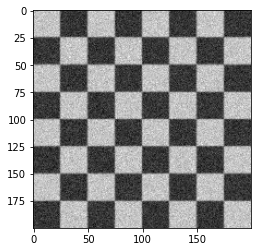

In [1]:
import matplotlib.pyplot as plt
import skimage
import numpy as np

# Make a noisy board. Standardize between -1 and 1 so that convolution works
img = skimage.data.checkerboard().astype('int64')
img = (img - 128) / 128
img += np.random.randn(200, 200) * 0.2
plt.imshow(img, cmap='gray')
img.max(), img.min(), img.mean()

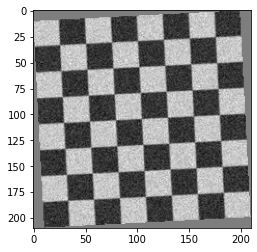

In [2]:
import scipy.ndimage as ndimage

# Rotate the image so it's not perfectly vertical
img = ndimage.rotate(img, angle=3)
plt.imshow(img, cmap='gray')

In [3]:
kernel = np.array([
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0]
])

# Kernel is: -0.5 = black, 0.5 = white. 0 is in between.
kernel = kernel - 0.5
kernel.shape

(8, 8)

In [4]:
from scipy.signal import convolve2d

In [5]:
# Make sure that in an all ones case (i.e. all white) it should give a 0 (no signal)
zeros = np.zeros((8, 8))
ones = np.ones((8, 8))
convolve2d(kernel, ones, mode='valid')

array([[0.]])

In [6]:
res = convolve2d(img, kernel, mode='same')

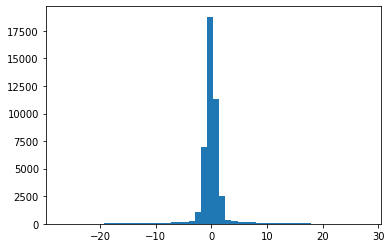

In [7]:
plt.hist(res.flatten(), bins=50)
plt.show()

Text(0.5, 1.0, 'Feature space')

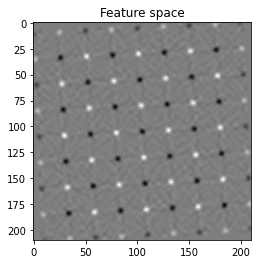

In [9]:
plt.imshow(res, cmap='gray')
plt.title('Feature space')

Text(0.5, 1.0, 'corners')

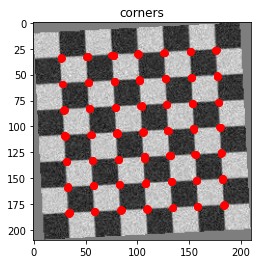

In [15]:
plt.imshow(img, cmap='gray')

# Note that negative values in convolution = same pattern but inverse, so keep extreme high and low values.
mask = (res >= 20) | (res <= -20)

inds = np.argwhere(mask)

plt.scatter(inds[:, 1], inds[:, 0], c='r')
plt.title('corners')

In [17]:
from sklearn.cluster import KMeans

data = inds

clf = KMeans(n_clusters=49)
classes = clf.fit_predict(data)

corners = []
for i in range(49):
    points = inds[classes == i, :]
    corners.append(np.mean(points, axis=0))
corners = np.array(corners)

Text(0.5, 1.0, 'Corners with clustering')

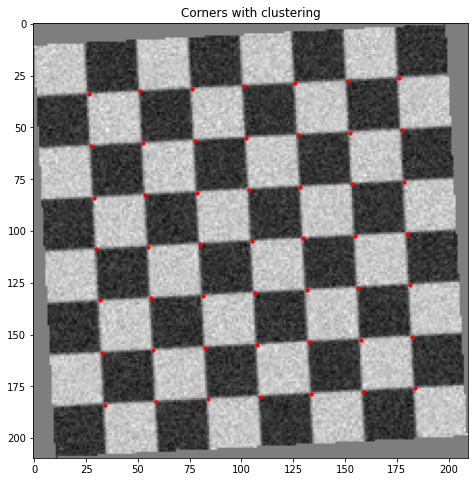

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(img, cmap='gray')

plt.scatter(corners[:, 1], corners[:, 0], c='r', s=10)
plt.title('Corners with clustering')